In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
import tensorflow as tf
from Energy_Models import Models as m
from tensorflow.keras.layers import  Flatten, Dense, Dropout,Input
from Data import preprocess_data as pr


In [2]:
df=pd.read_csv('F:\A.khorkhash\KAG_energydata_complete.csv')

In [3]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [5]:
df = pd.read_csv('F:\A.khorkhash\KAG_energydata_complete.csv',parse_dates=['date'], index_col= 'date')

In [6]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [7]:
data = df.resample('D').sum() 

In [8]:
df = df.resample('D').mean()
df.shape

(138, 28)

In [9]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11,136.666667,30.000000,20.808571,46.906210,20.153333,44.793175,20.140972,45.992440,19.492222,47.260813,...,16.918175,45.106210,5.922619,735.173810,89.285714,6.083333,40.845238,4.228571,26.248800,26.248800
2016-01-12,85.694444,4.236111,20.092326,45.142014,19.307655,43.779733,19.993646,44.933171,19.772778,44.556840,...,17.032847,45.680127,5.566319,742.628125,87.500000,5.784722,37.229167,3.596528,25.505072,25.505072
2016-01-13,97.013889,5.416667,19.197824,42.867772,18.568513,42.119669,19.609213,43.720891,19.009803,42.315174,...,16.953576,44.691476,4.856944,754.790625,83.406250,5.614583,31.559028,2.169792,23.464726,23.464726
2016-01-14,151.388889,5.000000,20.372078,42.435191,19.743131,40.699172,20.837581,43.399740,18.694271,43.231053,...,16.884815,45.428229,3.431944,749.767361,86.420139,6.277778,35.149306,1.316667,25.264569,25.264569
2016-01-15,125.347222,5.972222,22.280949,39.099294,21.528172,38.193897,20.959074,41.409884,19.615127,41.961036,...,17.345694,44.534329,2.665278,754.579861,88.385417,7.770833,40.208333,0.849653,26.289515,26.289515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-23,83.055556,2.013889,24.445046,47.025307,22.825978,47.749664,25.801574,42.977436,23.765955,45.311262,...,23.096240,46.394452,12.570486,755.849653,84.225694,4.208333,46.017361,9.851736,24.611743,24.611743
2016-05-24,96.180556,4.236111,24.299340,42.112535,22.617992,42.677685,25.368941,39.967807,23.869067,41.552216,...,22.765058,42.042955,11.568750,759.007292,76.680556,4.114583,33.975694,7.469097,25.494683,25.494683
2016-05-25,83.888889,2.569444,23.899353,38.929815,22.894673,38.182158,25.038329,38.137895,23.874266,38.582405,...,22.147823,39.681940,11.563542,756.887500,74.774306,1.350694,30.739583,6.819097,27.630188,27.630188


In [10]:
X_train, X_test = pr.train_test_split(df)
X_train, X_test, scaler = pr.scale_data(X_train, X_test)
X_train,Y_train=pr.convert_Multi_to_supervised(X_train)
X_test,Y_test=pr.convert_Multi_to_supervised(X_test)

In [11]:
X_test.shape , X_train.shape

((15, 21, 27), (69, 21, 27))

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, mean_absolute_percentage_error

def root_mean_squared_error(y_true, y_pred):    
    
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [13]:
X_train.shape

(69, 21, 27)

In [14]:
n_steps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], Y_train.shape[1]
model=m.lstm(n_steps,n_features,n_outputs).getModel()
model.compile(optimizer='adam', loss ='mse')
history = model.fit(X_train, Y_train, batch_size=256, validation_split=0.2,epochs=85, verbose=1, shuffle=False)

Epoch 1/85
1/1 [==============================] - 20s 20s/step - loss: 0.2165 - val_loss: 0.2202
Epoch 2/85
1/1 [==============================] - 0s 261ms/step - loss: 0.1926 - val_loss: 0.2103
Epoch 3/85
1/1 [==============================] - 0s 238ms/step - loss: 0.1809 - val_loss: 0.2000
Epoch 4/85
1/1 [==============================] - 0s 145ms/step - loss: 0.1698 - val_loss: 0.1876
Epoch 5/85
1/1 [==============================] - 0s 174ms/step - loss: 0.1564 - val_loss: 0.1699
Epoch 6/85
1/1 [==============================] - 0s 145ms/step - loss: 0.1428 - val_loss: 0.1485
Epoch 7/85
1/1 [==============================] - 0s 141ms/step - loss: 0.1165 - val_loss: 0.1211
Epoch 8/85
1/1 [==============================] - 0s 145ms/step - loss: 0.0888 - val_loss: 0.0901
Epoch 9/85
1/1 [==============================] - 0s 132ms/step - loss: 0.0691 - val_loss: 0.0698
Epoch 10/85
1/1 [==============================] - 0s 140ms/step - loss: 0.0878 - val_loss: 0.0684
Epoch 11/85
1/1 [===

In [15]:
m.evaluate(model,X_train, Y_train)

3/3 [==============================] - 0s 22ms/step - loss: 0.0393
evaluation : 0.039 


In [16]:
m.evaluate(model,X_test, Y_test)

1/1 [==============================] - 0s 53ms/step - loss: 0.0812
evaluation : 0.081 


In [17]:
Y_pred_test=model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [18]:
Y_pred_train=model.predict(X_train)

3/3 [==============================] - 0s 22ms/step


In [19]:
m.print_metrics(model,Y_train,Y_pred_train,Y_test,Y_pred_test)

Train RMSE value   : 0.198 
Train MSE value    : 0.039 
Train R2 value     : -0.018 
Train MAPE value   : 0.509 
Train RMLSE value  : 0.018 
Train MAE value    : 0.152 
---------------------------------------------
Test RMSE value   : 0.285 
Test MSE value   : 0.081 
Test R2 value   : -0.847 
Test MAPE value  : 0.962 
Test RMLSE value  : 0.039 
Test MAE value : 0.263 


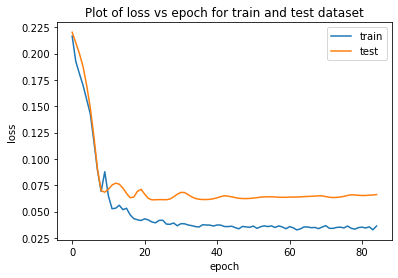

In [20]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()